In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

#Load Dataset
df = pd.read_csv("/content/online_retail_dataset.csv")
print(df.head())

#Basic Checks
df.shape
df.info()
df.describe()

#Data Cleaning

#Missing Values
df.isnull().sum()
df.dropna(inplace=True)

#Remove Duplicates
df.drop_duplicates(inplace=True)

#Fix Date Format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Remove Invalid Transactions
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

#Create Revenue Column
df['Revenue'] = df['Quantity'] * df['Price']

#Feature Engineering
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day






  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice 

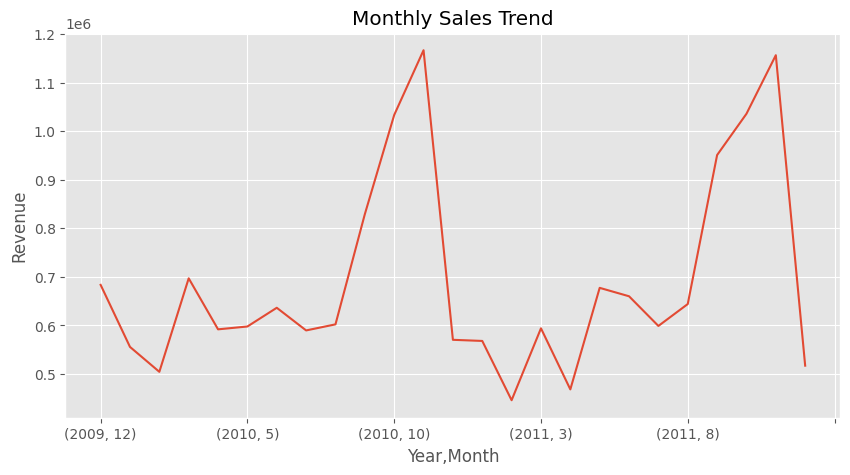

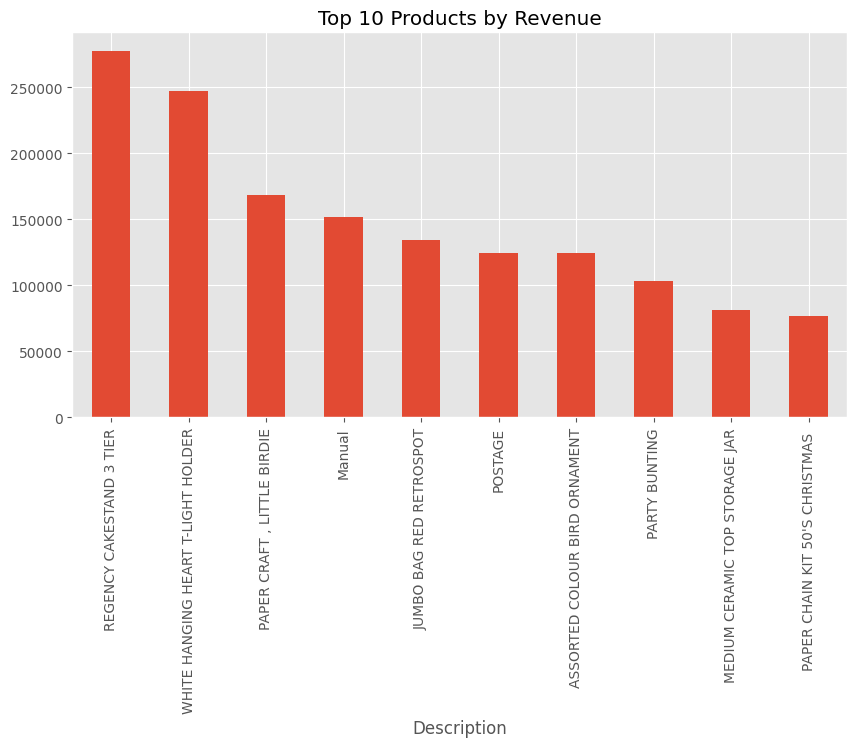

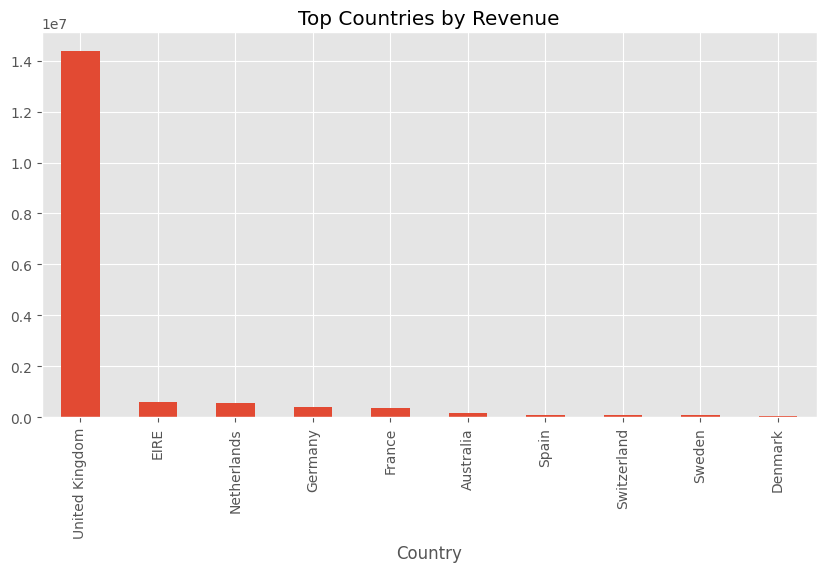

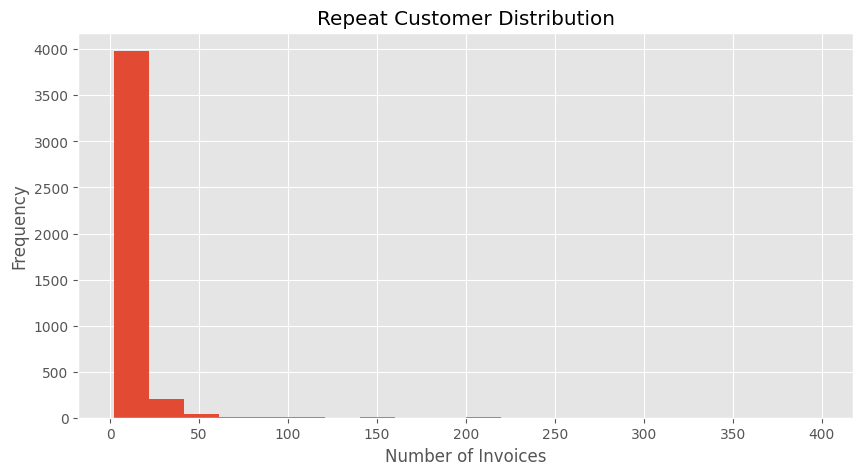

In [ ]:
#Exploratory Data Analysis

#A. Sales Trend Over Time
monthly_sales = df.groupby(['Year','Month'])['Revenue'].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()

#B. Top 10 Products by Revenue
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Products by Revenue")
plt.show()

#C. Country-wise Sales
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

country_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top Countries by Revenue")
plt.show()

#D. Customer Behavior (Repeat Customers)
repeat_customers = df.groupby('Customer ID')['Invoice'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1]

repeat_customers.plot(kind='hist', bins=20, figsize=(10,5))
plt.title("Repeat Customer Distribution")
plt.xlabel("Number of Invoices")
plt.show()

#Export Clean Data for SQL & Power BI
df.to_csv("cleaned_online_retail.csv", index=False)


